In [4]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [1]:
!apt-get update
!apt-get install -y iverilog

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,840 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,764 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

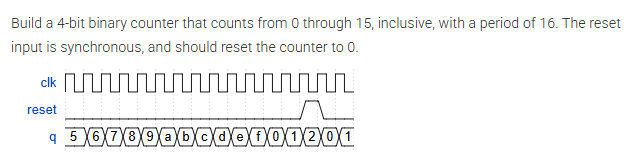

In [16]:
#Count15
%%writefile counters.v
module top_module (
    input clk,
    input reset,      // Synchronous active-high reset
    output reg [3:0] q);

    always @(posedge clk)
        begin
            if(reset)
                q <= 4'b0000;
            else if(q == 4'b1111)
                q <= 4'b0000;
            else
                q <= q + 4'b0001;
        end
endmodule

Overwriting counters.v


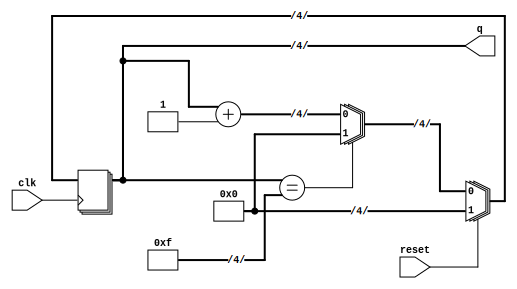

In [7]:
%%print_verilog
module top_module (
    input clk,
    input reset,      // Synchronous active-high reset
    output reg [3:0] q);

    always @(posedge clk)
        begin
            if(reset)
                q <= 4'b0000;
            else if(q == 4'b1111)
                q <= 4'b0000;
            else
                q <= q + 4'b0001;
        end
endmodule

In [32]:
%%writefile tb.v
`timescale 1ns/1ns

module tb;
  reg clk_tb, reset_tb; wire[3:0] q_tb;

  parameter CYCLE = 10;

  top_module top(.clk(clk_tb), .reset(reset_tb), .q(q_tb));

  task rst_dut();
    begin
      @(posedge clk_tb);
        reset_tb = 1'b1;
      @(posedge clk_tb);
        reset_tb = 1'b0;
    end
    endtask

  task initialize;
  begin
  {clk_tb, reset_tb}=2'b11;
  end
  endtask


  initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0, tb);
  initialize;
  rst_dut;
  #35;
  $finish;
  end

  initial
    begin
      $monitor("Inputs clock=%b reset=%b output=%b",clk_tb,reset_tb,q_tb);
    end

  always begin
    #(CYCLE/10);
    clk_tb = 1;
    #(CYCLE/10);
    clk_tb = 0;
  end
  endmodule


Overwriting tb.v


In [34]:
!iverilog -o tb.out counters.v tb.v
!vvp tb.out

tb.v:10: warning: task definition for "rst_dut" has an empty port declaration list!
VCD info: dumpfile tb.vcd opened for output.
Inputs clock=1 reset=1 output=0000
Inputs clock=0 reset=1 output=0000
Inputs clock=1 reset=1 output=0000
Inputs clock=0 reset=1 output=0000
Inputs clock=1 reset=0 output=0001
Inputs clock=0 reset=0 output=0001
Inputs clock=1 reset=0 output=0010
Inputs clock=0 reset=0 output=0010
Inputs clock=1 reset=0 output=0011
Inputs clock=0 reset=0 output=0011
Inputs clock=1 reset=0 output=0100
Inputs clock=0 reset=0 output=0100
Inputs clock=1 reset=0 output=0101
Inputs clock=0 reset=0 output=0101
Inputs clock=1 reset=0 output=0110
Inputs clock=0 reset=0 output=0110
Inputs clock=1 reset=0 output=0111
Inputs clock=0 reset=0 output=0111
Inputs clock=1 reset=0 output=1000
Inputs clock=0 reset=0 output=1000
Inputs clock=1 reset=0 output=1001
Inputs clock=0 reset=0 output=1001
Inputs clock=1 reset=0 output=1010
Inputs clock=0 reset=0 output=1010
Inputs clock=1 reset=0 output=1

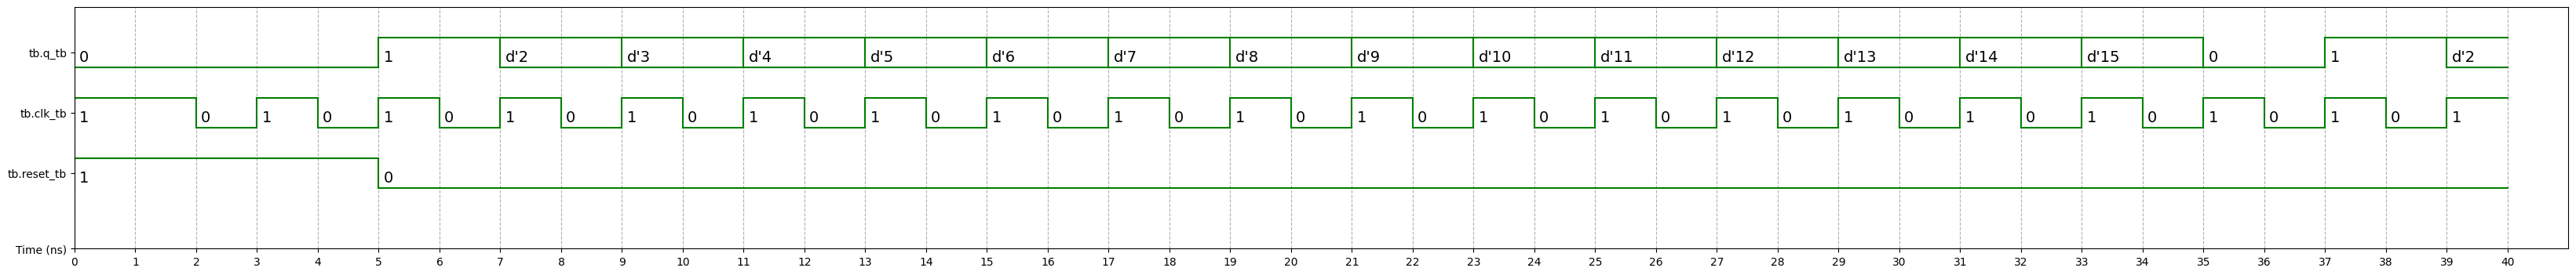

In [35]:
%%waveform tb.vcd
sign_list = ['tb.q_tb', 'tb.clk_tb', 'tb.reset_tb']  # Ensure this matches the signal name in the testbench
time_begin = 0
time_end = 40
base = 'dec'